In [375]:


from datetime import datetime, timedelta
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')

api_key = 'kgMN5tuNUwb7-F29s6xp' 

<IPython.core.display.Javascript object>


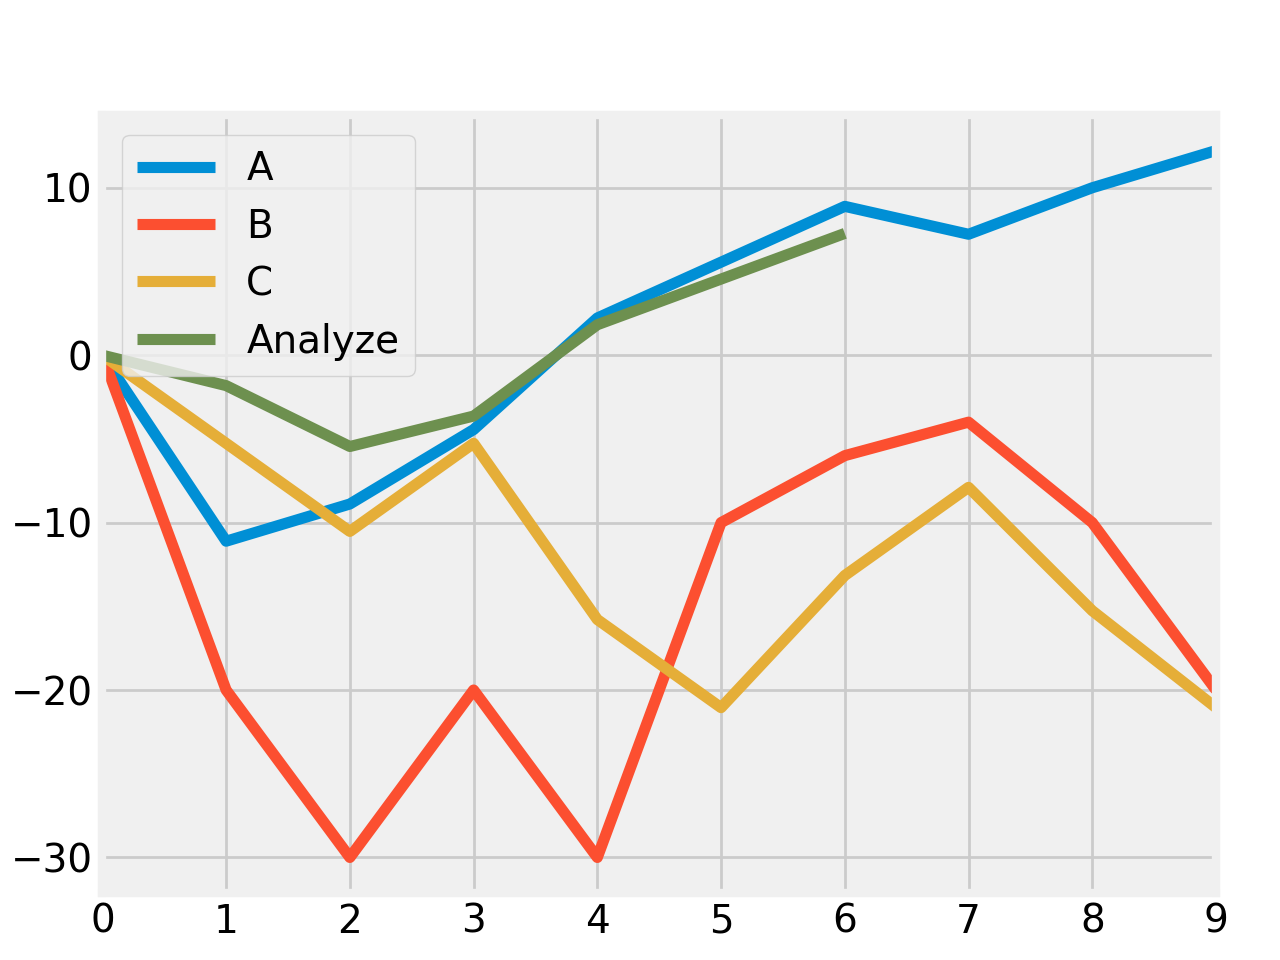

In [102]:
df1 = pd.DataFrame({'A':[45,40,41,43,46,47.5,49,48.25,49.5,50.5]},
                   index = [0,1,2,3,4,5,6,7,8,9])

df2 = pd.DataFrame({'B':[100,80,70,80,70,90,94,96,90,80]},
                   index = [0,1,2,3,4,5,6,7,8,9])

df3 = pd.DataFrame({'C':[19,18,17,18,16,15,16.5,17.5,16.1,15]},
                   index = [0,1,2,3,4,5,6,7,8,9])

#normalize all data sets
df1 = (df1 - df1.iloc[0]) / df1.iloc[0] * 100
df2 = (df2 - df2.iloc[0]) / df2.iloc[0] * 100
df3 = (df3 - df3.iloc[0]) / df3.iloc[0] * 100

main_df = pd.DataFrame()
main_df = df1
main_df['B'] = df2
main_df['C'] = df3

#add comparitive
#analyze_stock = pd.DataFrame({'X':[-.75,-.75,-.75,0,1,2,2.5,2,3,4]},
                   #index = [0,1,2,3,4,5,6,7,8,9])

#---- add stock to analyze
analyze_stock = pd.DataFrame({'X':[55,54,52,53,56,57.5,59]},
                   index = [0,1,2,3,4,5,6])
analyze_stock = (analyze_stock - analyze_stock.iloc[0]) / analyze_stock.iloc[0] * 100

main_df['Analyze'] = analyze_stock

# print(main_df)

main_df.plot()
plt.show()

In [3]:
### Make correlcation data between all states
Stock_Correlation = main_df.corr() # make large correlation grid
print(Stock_Correlation)

                A         B         C   Analyze
A        1.000000  0.459627 -0.607891  0.908072
B        0.459627  1.000000  0.249178  0.552977
C       -0.607891  0.249178  1.000000 -0.545802
Analyze  0.908072  0.552977 -0.545802  1.000000


       A    B     C
0  45.00  100  19.0
1  40.00   80  18.0
2  41.00   70  17.0
3  43.00   80  18.0
4  46.00   70  16.0
5  47.50   90  15.0
6  49.00   94  16.5
7  48.25   96  17.5
8  49.50   90  16.1
9  50.50   80  15.0


<IPython.core.display.Javascript object>


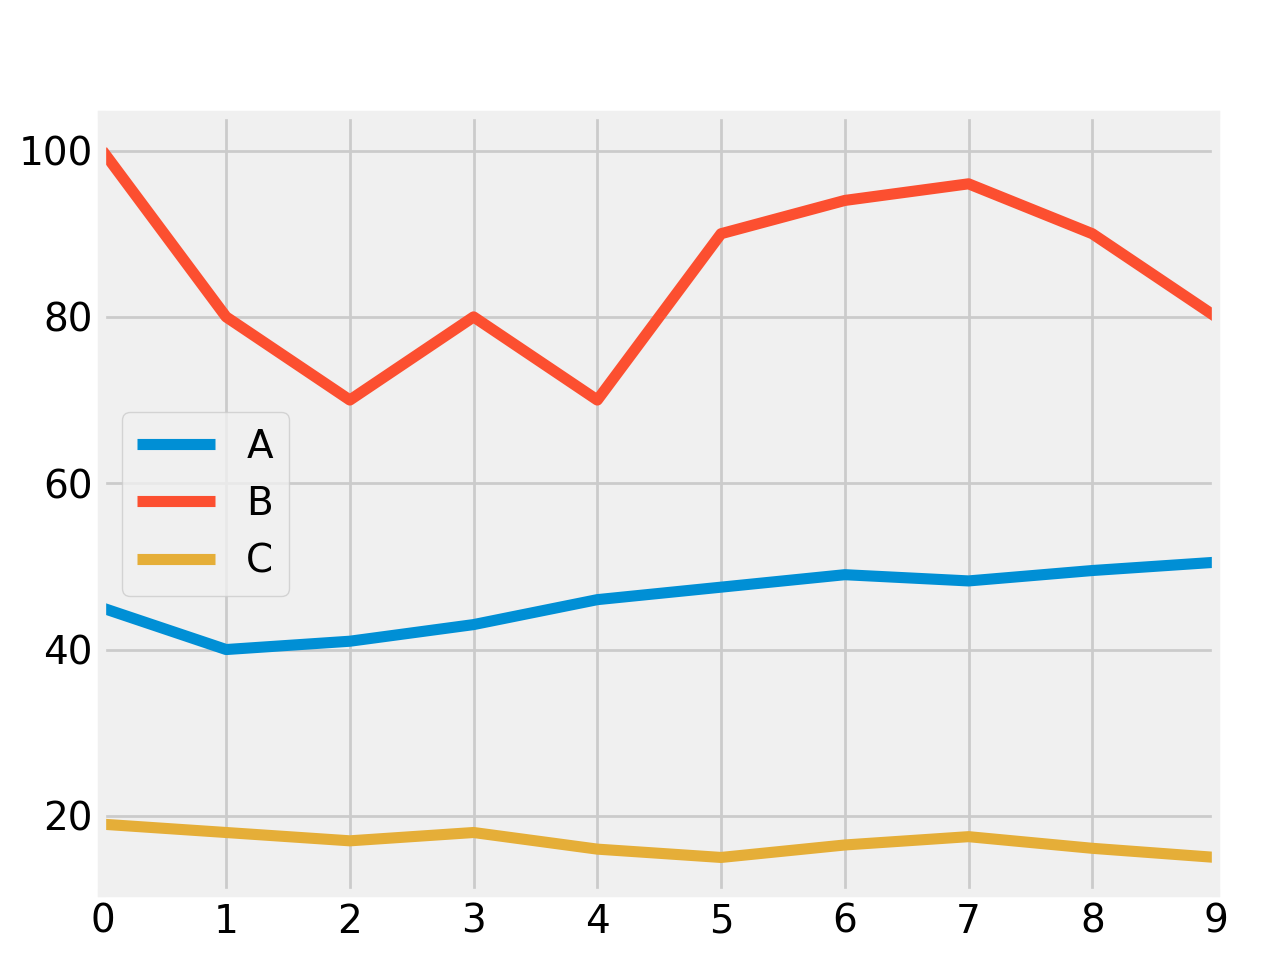

In [24]:
#####this works!!!!!!!
main_df = pd.DataFrame()

df = pd.read_csv('data/test-trainer.csv')
main_df = df.set_index('Index')
del main_df.index.name



# main_df = df1
# main_df['B'] = df2
# main_df['C'] = df3


print(main_df)

main_df.plot()
plt.show()  

<IPython.core.display.Javascript object>


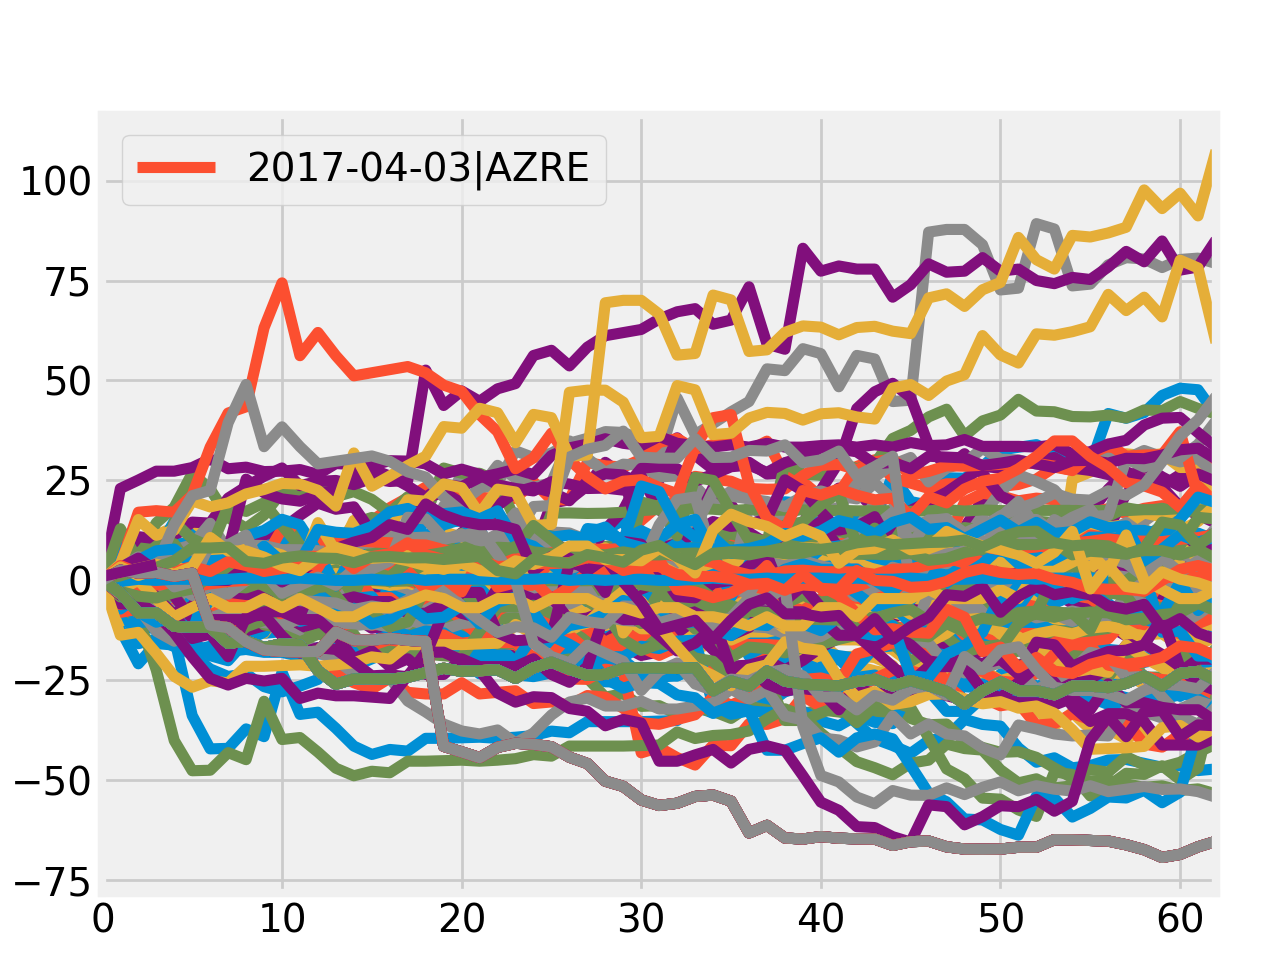

In [104]:
#####this works!!!!!!!
main_df = pd.DataFrame()

df = pd.read_csv('data/test-from-web.csv')
df = df.set_index('Index').T

for column in df:    
    main_df[column] = (df[column] - df[column].iloc[0]) / df[column].iloc[0] * 100

#print(main_df)

main_df.plot(legend=None) # don't show legend
plt.show()  

In [5]:
# skip this???
df1 = main_df

print("Data Frame")
print(df1)
print()

print("Correlation Matrix")
print(df1.corr())
print()

def get_redundant_pairs(df1):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df1, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df1)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df1, 3))

Data Frame
    2017-03-01|WTW  2017-03-01|DY  2017-03-01|ECR  2017-03-01|DAR  \
0         0.000000       0.000000        0.000000        0.000000   
1        -2.506812       1.148236        0.000000       -3.744044   
2        -3.051771      -0.134478        5.220884       -2.859088   
3        -3.324251       0.175856        4.417671       -3.675970   
4        -4.032698      -1.530982       -3.212851       -3.744044   
5        -3.869210      -1.613737       -8.032129       -3.880191   
6        -4.632153      -2.286128       -2.811245       -4.424779   
7        -9.482289      -1.117203       -4.016064       -3.675970   
8        -9.373297      -1.137892       -8.032129       -3.539823   
9       -13.242507      -3.372298      -13.253012       -4.424779   
10      -12.806540      -1.262025       -7.228916       -2.995235   
11      -14.168937      -2.524051       -8.433735       -2.654867   
12      -18.365123      -3.258508      -10.843373       -1.225323   
13      -18.637602     

In [8]:
# skip this...but it works
df2= main_df

### Make correlcation data between all states
Stock_Correlation = df2.corr(method='pearson') # make large correlation grid
print(Stock_Correlation)






                 2017-03-01|WTW  2017-03-01|DY  2017-03-01|ECR  \
2017-03-01|WTW         1.000000       0.405999       -0.060429   
2017-03-01|DY          0.405999       1.000000       -0.446504   
2017-03-01|ECR        -0.060429      -0.446504        1.000000   
2017-03-01|DAR         0.886277       0.363798       -0.065423   
2017-03-01|SYX         0.844400       0.529345       -0.123023   
2017-03-01|SXE         0.429678       0.471899       -0.149840   
2017-03-01|RYI        -0.510061       0.098585       -0.226509   
2017-03-01|DPLO        0.850028       0.342896       -0.017707   
2017-03-02|CCO        -0.952494      -0.315991        0.001850   
2017-03-02|GCP        -0.671467      -0.091249       -0.369479   
2017-03-02|AMRC        0.793909       0.443479       -0.120774   
2017-03-02|ANF         0.780013       0.322127       -0.097605   
2017-03-03|SNAP       -0.164004      -0.122788       -0.073767   
2017-03-07|NMBL        0.787450       0.562738        0.544386   
2017-03-07

TEST: Corr Results

-28.8590604027
selected gains=-14.0939597315


<IPython.core.display.Javascript object>


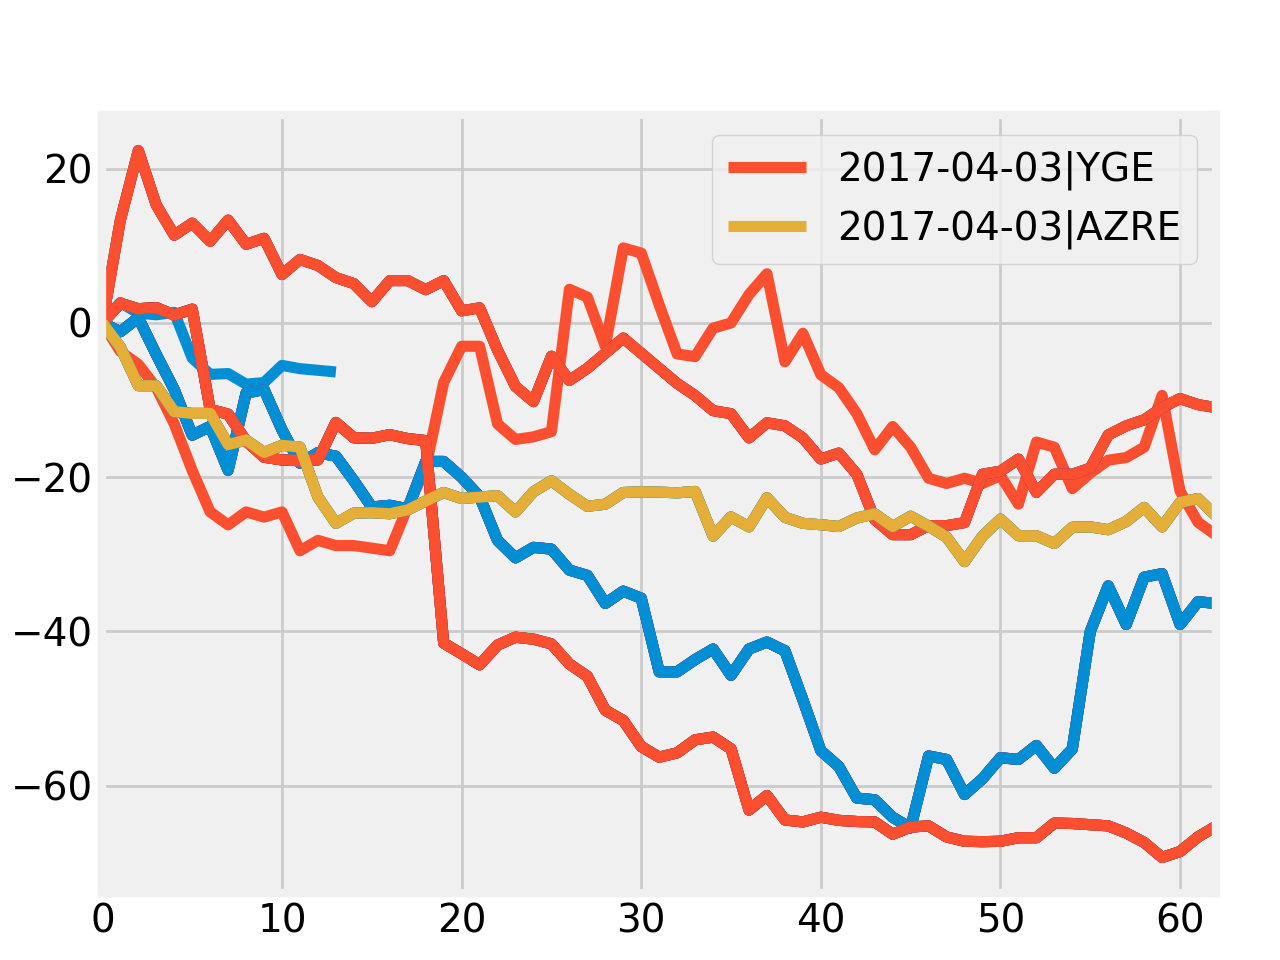

In [66]:
#skip this...
df2= main_df
df3 = pd.DataFrame()
main_df3 = pd.DataFrame()
df_corr_results = pd.DataFrame()
main_df_corr_results = pd.DataFrame()

df3 = pd.read_csv('data/analyze.csv')
df3 = df3.set_index('Index').T

for column1 in df3:    
    main_df3[column1] = (df3[column1] - df3[column1].iloc[0]) / df3[column1].iloc[0] * 100

#print(df3)
#print(main_df3)

x1= main_df3['TEST'] # convert to series so you can compare

df_corr_results = df2.corrwith(x1) # make the correlation
main_df_corr_results = df_corr_results.sort_values(ascending=False)
main_df_corr_results.to_frame().reset_index()

#show correlated values
print('TEST: Corr Results')
# print(main_df_corr_results)
# for idx, val in enumerate(main_df_corr_results):
#     print(idx, val)
print()



selected_stock = '2017-03-29|PN'

print(df2[selected_stock][14])

calc_selected_stock_gains = (df2[selected_stock][25] - df2[selected_stock][14]) / df2[selected_stock][14] * 100
print('selected gains='+str(df2[selected_stock][25]))

main_df3.plot(legend=None) # don't show legend
df2[selected_stock].plot()
plt.show()  

TEST: 2017-04-03|YGE
       Corr           Stock
0  1.000000  2017-04-03|YGE
1  0.964522  2017-04-04|YGE
2  0.927623  2017-05-05|CRC
3  0.911126   2017-05-05|PN
4  0.903587  2017-04-05|DHX

Benchmark: 2017-04-03|YGE


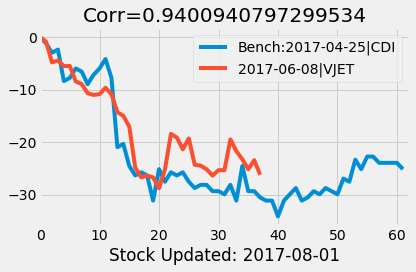

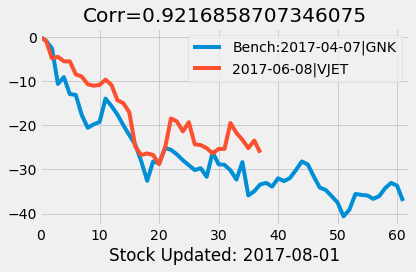

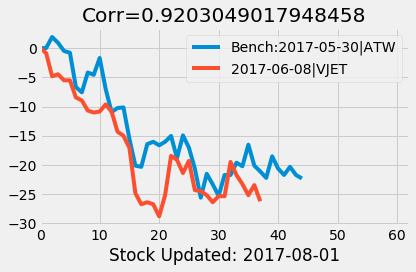

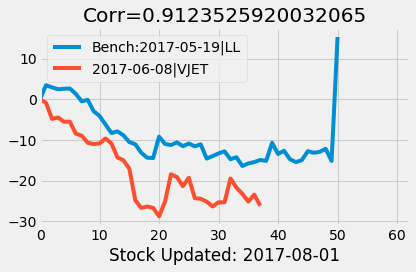

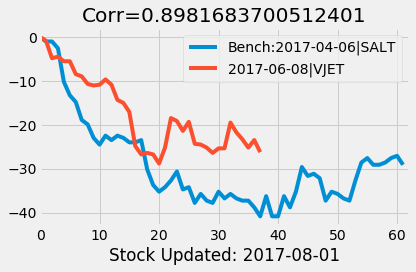

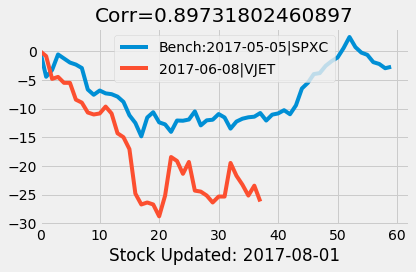

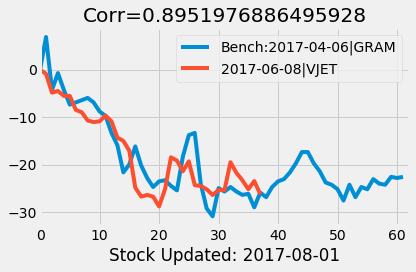

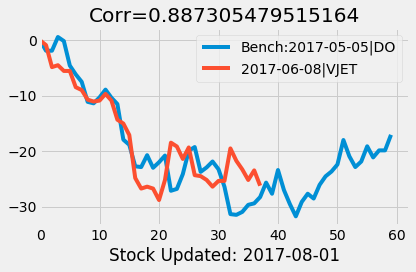

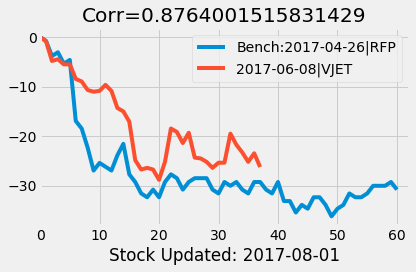

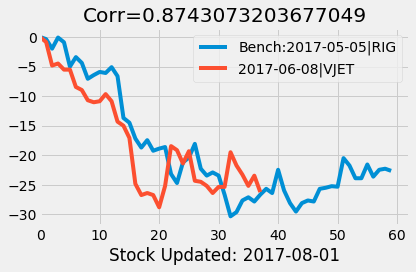

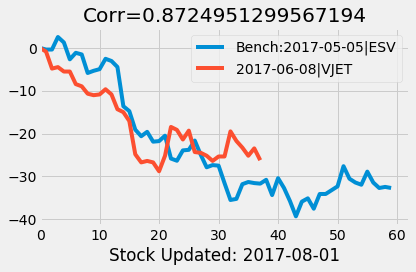

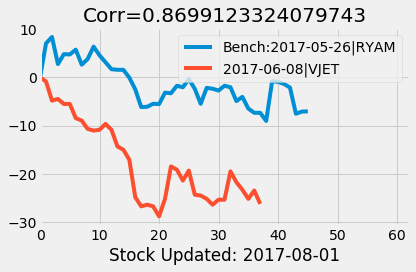

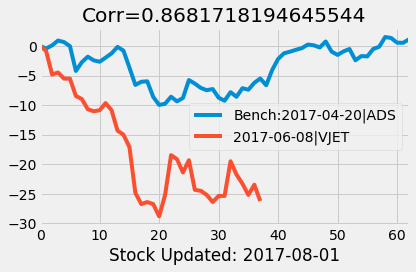

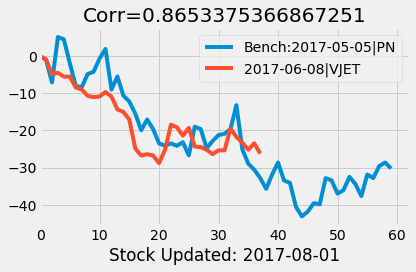

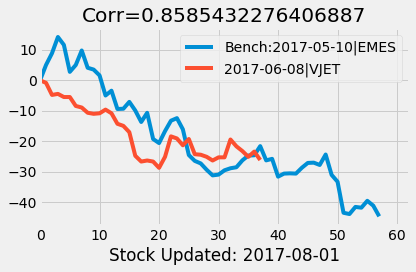

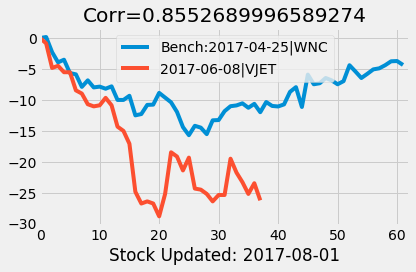

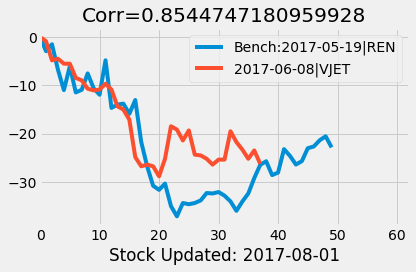

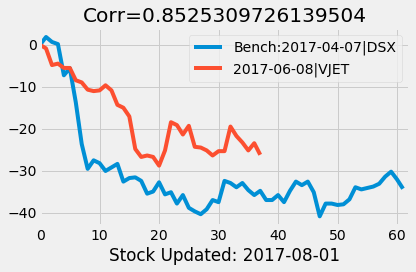

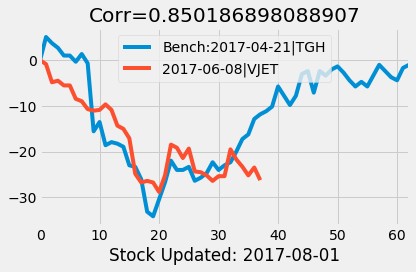

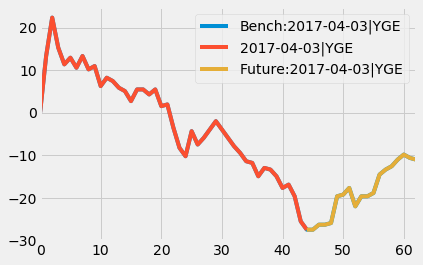

In [2]:
#don't use... more below run this
df2= main_df
df3 = pd.DataFrame()
main_df3 = pd.DataFrame()
df_corr_results = pd.DataFrame()
main_df_corr_results = pd.DataFrame()
main_plot = pd.DataFrame()
    
df3 = pd.read_csv('data/file 4-2017.csv')
df3 = df3.set_index('Index').T

for column in df3:    
    main_df3[column] = (df3[column] - df3[column].iloc[0]) / df3[column].iloc[0] * 100

#---------pick a stock
stock_num = 0
num_days = 45
analyze_stock_text = df3.columns.values[stock_num]
x1 = main_df3[analyze_stock_text] # convert selected stock to series so you can coorilate
analyze_plots = pd.DataFrame(data=main_df3[analyze_stock_text][:num_days]) #convert into df to use to plot
num_days = num_days - 1 #reset line start to match with current line
analyze_plots_future = pd.DataFrame(data=main_df3[analyze_stock_text][num_days:]) # Get future results
#---------pick a stock

# correlate selected stock to all test data stocks
df_corr_results = df2.corrwith(x1)
main_df_corr_results = df_corr_results.sort_values(ascending=False)
main_df_corr_results = pd.DataFrame({'Stock':main_df_corr_results.index, 'Corr':main_df_corr_results.values}) #turns series into a dataframe


#show correlated values
print('TEST: '+str(analyze_stock_text))
print(main_df_corr_results.head())
print()

#---------pick a benchmark
benchmark_num = 0
benchmark_stock_text = main_df_corr_results['Stock'].iloc[benchmark_num] # get benchmark text
print('Benchmark: '+str(benchmark_stock_text))
benchmark_plots = pd.DataFrame(data=df2[benchmark_stock_text]) #loopup benchmark data using TEXT
#---------pick a benchmark

# plot data
main_plot['Bench:'+benchmark_stock_text] = benchmark_plots[benchmark_stock_text]
main_plot[''+analyze_stock_text] = analyze_plots[analyze_stock_text]
main_plot['Future:'+analyze_stock_text] = analyze_plots_future
main_plot.plot()
plt.show()  


In [9]:
# used to work...now plot won't show up
from datetime import datetime, timedelta
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')

api_key = 'kgMN5tuNUwb7-F29s6xp' 

##----------TRAINING DATA
main_df = pd.DataFrame()

df = pd.read_csv('data/training_data/gainers_2017-04-05_trainer_8_perc_jumps.csv')
df = df.set_index('Index').T

for column in df:    
    main_df[column] = (df[column] - df[column].iloc[0]) / df[column].iloc[0] * 100
    
#CURRENT
df2= main_df
df3 = pd.DataFrame()
main_df3 = pd.DataFrame()
df_corr_results = pd.DataFrame()
main_df_corr_results = pd.DataFrame()
main_plot = pd.DataFrame()
    
#---------THE FILES TO ANALYZE
#df3 = pd.read_csv('gainers-loser/daily_exports/file 4-2017.csv')
train1 = pd.read_csv('data/daily_exports/atw_2017-06-12.csv')
#train1 = pd.read_csv('data/daily_exports/gainers_2017-05-24-25-26.csv')
train1 = train1.set_index('Index').T

#-------main training data
df3 = train1
for column in df3:    
    main_df3[column] = (df3[column] - df3[column].iloc[0]) / df3[column].iloc[0] * 100
    
#---------------------------------------
#---------------------------------------pick a stock
stock_num = 3
#---------------------------------------
#---------------------------------------pick a stock
#num_days = 40 # used in future only
analyze_stock_text = df3.columns.values[stock_num]
x1 = main_df3[analyze_stock_text] # convert selected stock to series so you can coorilate
analyze_plots = pd.DataFrame(data=main_df3[analyze_stock_text]) #convert into df to use to plot

#below was for testing when future is needed
# analyze_plots = pd.DataFrame(data=main_df3[analyze_stock_text][:num_days]) #convert into df to use to plot
# num_days = num_days - 1 #reset line start to match with current line
# analyze_plots_future = pd.DataFrame(data=main_df3[analyze_stock_text][num_days:]) # Get future results
#---------pick a stock

# correlate selected stock to all test data stocks
df_corr_results = df2.corrwith(x1)
main_df_corr_results = df_corr_results.sort_values(ascending=False)
main_df_corr_results = pd.DataFrame({'Stock':main_df_corr_results.index, 'Corr':main_df_corr_results.values}) #turns series into a dataframe

d = datetime.today() - timedelta(days=1) # today's day  minus one for plot display

first_loop = 0 #FOR TELLING IF THERE ARE ANY STOCKS TO ANALYZE

for index, row in main_df_corr_results.iterrows(): # loop each value of main_df_corr...
    
    if row['Corr'] >= .85:
        
        first_loop = 1
        
        benchmark_stock_text = row['Stock']

        #show correlated values
        print('TEST: '+str(analyze_stock_text))
        print (row['Corr'], row['Stock'])
        print()

        #---------pick a benchmark
        print('Benchmark: '+str(benchmark_stock_text))
        benchmark_plots = pd.DataFrame(data=df2[benchmark_stock_text]) #loopup benchmark data using TEXT
        #---------pick a benchmark

        # plot data
        main_plot['Bench:'+benchmark_stock_text] = benchmark_plots[benchmark_stock_text]
        main_plot[''+analyze_stock_text] = analyze_plots[analyze_stock_text]
        #main_plot['Future:'+analyze_stock_text] = analyze_plots_future # uncomment for future
        main_plot.plot()
        plt.title('Corr='+ str(row['Corr']))
        plt.xlabel('Stock Updated: '+d.strftime('%Y-%m-%d'))
        plt.tight_layout() # make room for lables
        plt.draw() # you can also use plt.show()
        
        del main_plot['Bench:'+benchmark_stock_text] # delete line from PLOT
        del main_plot[''+analyze_stock_text]
        #del main_plot['Future:'+analyze_stock_text] # uncomment for future
    else: # if row['Corr'] >= .80
        if first_loop == 0:
            print('NO STOCKS TO ANALYZE')
        break



IndexError: index 3 is out of bounds for axis 0 with size 1

In [8]:
from datetime import datetime, timedelta
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')

api_key = 'kgMN5tuNUwb7-F29s6xp' 

##----------TRAINING DATA
main_df = pd.DataFrame()

df = pd.read_csv('data/training_data/gainers_2017-04-05_trainer_8_perc_jumps.csv')
df = df.set_index('Index').T

for column in df:    
    main_df[column] = (df[column] - df[column].iloc[0]) / df[column].iloc[0] * 100
    
#CURRENT
df2= main_df
df3 = pd.DataFrame()
main_df3 = pd.DataFrame()
df_corr_results = pd.DataFrame()
main_df_corr_results = pd.DataFrame()
main_plot = pd.DataFrame()
    
#---------THE FILES TO ANALYZE
#df3 = pd.read_csv('gainers-loser/daily_exports/file 4-2017.csv')
train1 = pd.read_csv('data/daily_exports/gainers_2017-06-08-09.csv')
#train1 = pd.read_csv('data/daily_exports/gainers_2017-05-24-25-26.csv')
train1 = train1.set_index('Index').T

#-------main training data
df3 = train1
for column in df3:    
    main_df3[column] = (df3[column] - df3[column].iloc[0]) / df3[column].iloc[0] * 100
    
#---------------------------------------
#---------------------------------------pick a stock
stock_num = 3
#---------------------------------------
#---------------------------------------pick a stock
#num_days = 40 # used in future only
analyze_stock_text = df3.columns.values[stock_num]
x1 = main_df3[analyze_stock_text] # convert selected stock to series so you can coorilate
analyze_plots = pd.DataFrame(data=main_df3[analyze_stock_text]) #convert into df to use to plot

#below was for testing when future is needed
# analyze_plots = pd.DataFrame(data=main_df3[analyze_stock_text][:num_days]) #convert into df to use to plot
# num_days = num_days - 1 #reset line start to match with current line
# analyze_plots_future = pd.DataFrame(data=main_df3[analyze_stock_text][num_days:]) # Get future results
#---------pick a stock

# correlate selected stock to all test data stocks
df_corr_results = df2.corrwith(x1)
main_df_corr_results = df_corr_results.sort_values(ascending=False)
main_df_corr_results = pd.DataFrame({'Stock':main_df_corr_results.index, 'Corr':main_df_corr_results.values}) #turns series into a dataframe

d = datetime.today() - timedelta(days=1) # today's day  minus one for plot display

first_loop = 0 #FOR TELLING IF THERE ARE ANY STOCKS TO ANALYZE

for index, row in main_df_corr_results.iterrows(): # loop each value of main_df_corr...
    
    if row['Corr'] >= .85:
        
        first_loop = 1
        
        benchmark_stock_text = row['Stock']

        #show correlated values
        print('TEST: '+str(analyze_stock_text))
        print (row['Corr'], row['Stock'])
        print()

        #---------pick a benchmark
        print('Benchmark: '+str(benchmark_stock_text))
        benchmark_plots = pd.DataFrame(data=df2[benchmark_stock_text]) #loopup benchmark data using TEXT
        #---------pick a benchmark

        # plot data
        main_plot['Bench:'+benchmark_stock_text] = benchmark_plots[benchmark_stock_text]
        main_plot[''+analyze_stock_text] = analyze_plots[analyze_stock_text]
        #main_plot['Future:'+analyze_stock_text] = analyze_plots_future # uncomment for future
        main_plot.plot()
        plt.title('Corr='+ str(row['Corr']))
        plt.xlabel('Stock Updated: '+d.strftime('%Y-%m-%d'))
        plt.tight_layout() # make room for lables
        plt.draw() # you can also use plt.show()
        
        del main_plot['Bench:'+benchmark_stock_text] # delete line from PLOT
        del main_plot[''+analyze_stock_text]
        #del main_plot['Future:'+analyze_stock_text] # uncomment for future
    else: # if row['Corr'] >= .80
        if first_loop == 0:
            print('NO STOCKS TO ANALYZE')
        break

plt.close('all')


TEST: 2017-06-08|BABA
0.9385370097047442 2017-05-19|WTW

Benchmark: 2017-05-19|WTW
TEST: 2017-06-08|BABA
0.9214965247900853 2017-05-09|W

Benchmark: 2017-05-09|W
TEST: 2017-06-08|BABA

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



0.9131198738514432 2017-05-12|CGI

Benchmark: 2017-05-12|CGI
TEST: 2017-06-08|BABA
0.8776220312890229 2017-04-11|SQNS

Benchmark: 2017-04-11|SQNS
TEST: 2017-06-08|BABA
0.8770088432643934 2017-04-25|CVO

Benchmark: 2017-04-25|CVO
TEST: 2017-06-08|BABA
0.8758057123090186 2017-05-05|SYX

Benchmark: 2017-05-05|SYX
TEST: 2017-06-08|BABA
0.8679765752203932 2017-05-01|CVO

Benchmark: 2017-05-01|CVO
TEST: 2017-06-08|BABA
0.8664195059149356 2017-05-05|CVNA

Benchmark: 2017-05-05|CVNA
TEST: 2017-06-08|BABA
0.8645705722362174 2017-05-18|CSLT

Benchmark: 2017-05-18|CSLT
TEST: 2017-06-08|BABA
0.8625128849511783 2017-04-20|VJET

Benchmark: 2017-04-20|VJET
TEST: 2017-06-08|BABA
0.8602166769873534 2017-05-31|HTZ

Benchmark: 2017-05-31|HTZ
TEST: 2017-06-08|BABA
0.8574482373919561 2017-05-04|HIVE

Benchmark: 2017-05-04|HIVE
TEST: 2017-06-08|BABA
0.8563917137441982 2017-04-27|ASGN

Benchmark: 2017-04-27|ASGN
TEST: 2017-06-08|BABA
0.8555120941151714 2017-05-15|SYX

Benchmark: 2017-05-15|SYX
TEST: 2017-06